In [25]:

import os
import numpy as np
import pandas as pd
from collections import defaultdict
data_folder = os.path.join(os.path.expanduser("~"),"Data","DataminingChapter5Ads")
data_filename = os.path.join(data_folder,"ad.data")

def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan
    else:
        return np.nan



In [26]:
converters = defaultdict(convert_number)
converters[1558] = lambda x: 1 if x.strip() == "ad." else 0


In [52]:
ads = pd.read_csv(data_filename, header=None, converters=converters)

/home/mcy/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
ads = ads.applymap(lambda x: 0 if isinstance(x, str) and not x == "ad." else x)
ads[[0,1,2]] = ads[[0,1,2]].astype(float)
X = ads.drop(1558, axis=1).values
y = ads[1558]
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
Xd = pca.fit_transform(X)
np.set_printoptions(precision=3, suppress=True)
pca.explained_variance_ratio_

array([ 0.086,  0.043,  0.033,  0.028,  0.023])

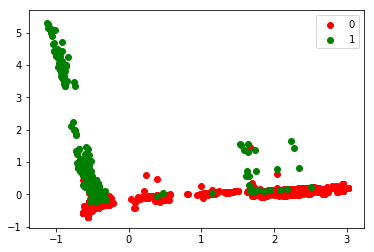

In [56]:
%matplotlib inline
from matplotlib import pyplot as plt
classes = set(y)
colors = ["red","green"]
for cur_class,color in zip(classes,colors):
    mask = (y == cur_class).values
    plt.scatter(Xd[mask,0],Xd[mask,1], marker='o', color=color, label=int(cur_class))
plt.legend()
plt.show()